# Financial Market


Tugas Machine Learning Minggu 2 Azmi Taqiuddin Syah

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [16]:
# Load data
data = pd.read_csv('FinancialMarket.csv')



In [17]:
# Split data menjadi fitur (x) dan target (y)
x = data['x'].values.reshape(-1, 1)
y = data['combined_data'].values



In [18]:
# Split data menjadi training set dan testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [19]:
# Regresi Linear Biasa
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
y_pred_linear = model_linear.predict(x_test)

# Regresi Linear dengan Basis Fungsi
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train)
y_pred_poly = model_poly.predict(x_test_poly)



In [20]:
# Evaluasi model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)



In [21]:
print("Regresi Linear Biasa:")
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("R-Squared:", r2_linear)



Regresi Linear Biasa:
MSE: 9.401377787555104
RMSE: 3.0661666274935393
R-Squared: 0.6781603066194921


In [22]:
print("\nRegresi Linear dengan Basis Fungsi:")
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("R-Squared:", r2_poly)




Regresi Linear dengan Basis Fungsi:
MSE: 1.3480931930431013
RMSE: 1.1610741548424464
R-Squared: 0.9538503919636472


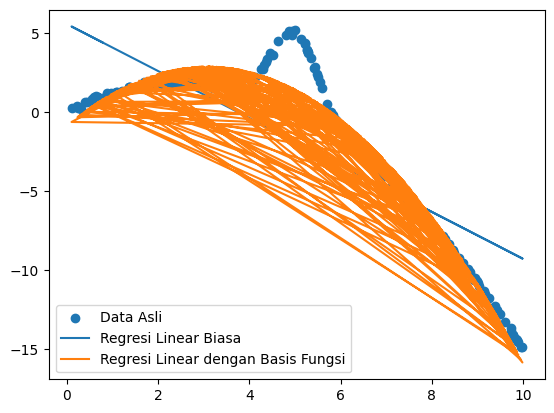

In [23]:
# Plot hasil prediksi
plt.scatter(x_test, y_test, label='Data Asli')
plt.plot(x_test, y_pred_linear, label='Regresi Linear Biasa')
plt.plot(x_test, y_pred_poly, label='Regresi Linear dengan Basis Fungsi')
plt.legend()
plt.show()